In [136]:
import pandas as pd
import numpy as np

# Load Chipotle Dataset

In [137]:
cp = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/datasets/chipotle.tsv', sep = '\t')
cp.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [138]:
print(cp.shape)
print(cp.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [139]:
cp['order_id'] = cp['order_id'].astype('str')

# Figure Out Numerical Features

In [140]:
cp.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [141]:
print(len(cp['order_id'].unique()))
print(len(cp['item_name'].unique()))

1834
50


# Navigate Data

- What is the most popular item?
- The total amount of order according to items

### What is the most popular item?

In [142]:
# print the 10 most popular items 
top10 = cp['item_name'].value_counts()[:10]
for i, (item, cnt) in enumerate(top10.iteritems(), 1):
    print('Top {0}: {1} {2}'.format(i, item, cnt))

Top 1: Chicken Bowl 726
Top 2: Chicken Burrito 553
Top 3: Chips and Guacamole 479
Top 4: Steak Burrito 368
Top 5: Canned Soft Drink 301
Top 6: Steak Bowl 211
Top 7: Chips 211
Top 8: Bottled Water 162
Top 9: Chicken Soft Tacos 115
Top 10: Chicken Salad Bowl 110


In [143]:
cp['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

### The total amount of order according to items

In [144]:
cp.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [145]:
order_count = cp.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [146]:
item_quantity = cp.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

# Visualization

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt

In [148]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
item_names = item_quantity.index.tolist()
x_pos = np.arange(len(item_names))
order_cnt = item_quantity.values.tolist()

In [105]:
item_names

['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda']

Text(0.5, 1.0, 'Distribution of all orderd item')

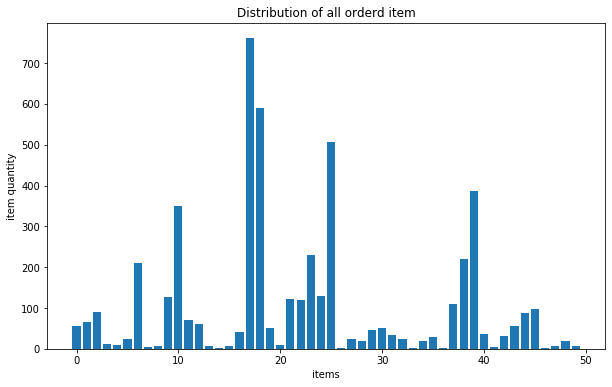

In [150]:
plt.figure(figsize = (10,6))
plt.bar(x_pos, order_cnt, align = 'center')
plt.xlabel('items')
plt.ylabel('item quantity')
plt.title('Distribution of all orderd item')

In [151]:
cp['item_name'].value_counts()[:10]

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [152]:
cp['item_name'].unique()[:10]

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos'], dtype=object)

# Preprocessing Data

In [153]:
# preprocess price data from str to float
cp['item_price'] = cp['item_price'].apply(lambda x: float(x[1:]))
cp.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [155]:
cp.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### More Research Questions

- get mean values of price of order
- get ids which orderd more than $10
- get price of each item
- get how many “Veggie Salad Bowl” were sold
- get number of orders that ordered 2 or more “Chicken Bowl”

#### get mean values of price of order

In [161]:
cp.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

#### get ids which orderd more than $10

In [175]:
results = cp.groupby('order_id').sum()
results = results[results['item_price'] >= 10]
print(results.index.values)

['1' '10' '100' ... '997' '998' '999']


#### get price of each item

In [192]:
cp_item = cp[cp['quantity']==1]
# min = no extra side
price_per_item = cp_item.groupby('item_name')['item_price'].min()
price_per_item.sort_values(ascending = False)[:10]

item_name
Carnitas Salad Bowl      9.39
Steak Salad Bowl         9.39
Barbacoa Salad Bowl      9.39
Barbacoa Soft Tacos      8.99
Carnitas Salad           8.99
Carnitas Crispy Tacos    8.99
Steak Soft Tacos         8.99
Carnitas Bowl            8.99
Carnitas Soft Tacos      8.99
Barbacoa Crispy Tacos    8.99
Name: item_price, dtype: float64

In [193]:
item_names = item_quantity.index.tolist()
x_pos = np.arange(len(item_names))
item_price = price_per_item.values.tolist()

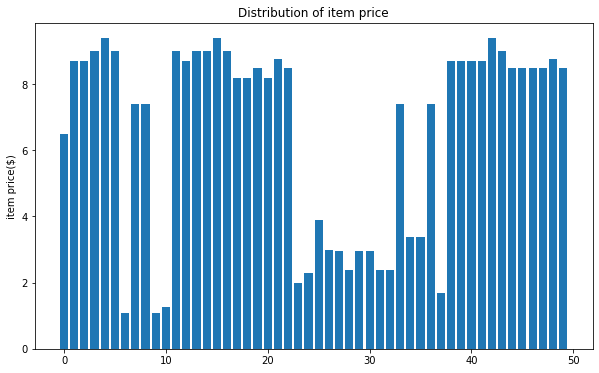

In [196]:
plt.figure(figsize = (10,6))
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

#### histogram for price

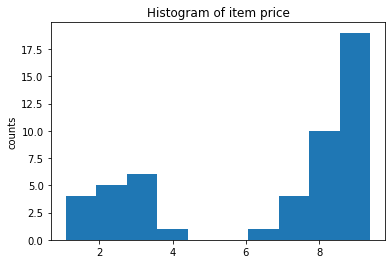

In [198]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

#### get how many “Veggie Salad Bowl” were sold

In [252]:
# ordered 18 times in total
results = cp[cp['item_name'] == 'Veggie Salad Bowl']
results = results.drop_duplicates(['item_name','order_id'])
results.groupby('item_price').sum()

,quantity
item_price,
8.75,8
11.25,10


#### get number of orders that ordered 2 or more “Chicken Bowl”

In [254]:
# get orders which ordered 2 or more “Chicken Bowl”
chipo_chicken = cp[cp['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


In [256]:
# Get total number of order “Chicken Bowl” from orders which include 2 or more Chicken Bowl”
chipo_chicken = cp[cp['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64